### Exploratory Data analysis and predicting accuracy on HR_logistic regression

In [40]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [41]:
#loading the dataset
data=pd.read_csv('HR_comma_sep.csv')

In [42]:
data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [43]:
data.shape

(14999, 10)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [45]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

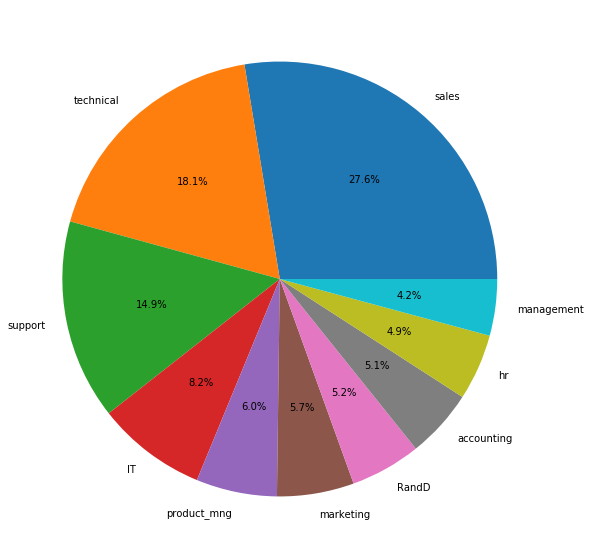

In [46]:
data['Department'].value_counts()
plt.figure(figsize=(12,10))
plt.pie(data['Department'].value_counts(),labels=data['Department'].value_counts().index,autopct='%1.1f%%')
plt.show()

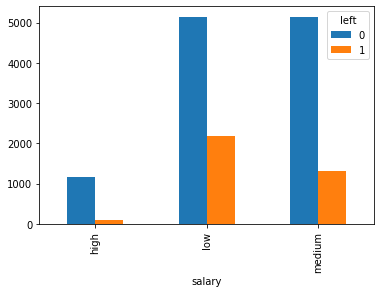

In [47]:
pd.crosstab(data['salary'],data['left']).plot(kind='bar')

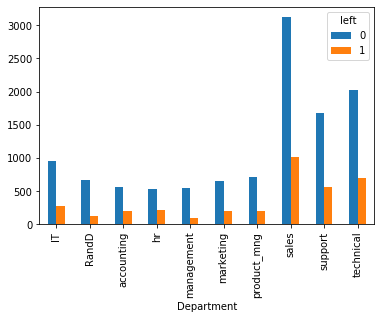

In [48]:
pd.crosstab(data.Department,data.left).plot(kind='bar')

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
new=data[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
new.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [51]:
salary_dummies=pd.get_dummies(new.salary)

In [52]:
salary_dummies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [53]:
df=pd.concat([new,salary_dummies],axis=1)
df.head(5)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [54]:
df.drop('salary',axis=1).head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [55]:
X=df.drop('salary',axis=1)
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [56]:
y=data.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
print('Shape of X_train',X_train.shape)
print('Shape of X_test',X_test.shape)
print('Shape of y_train',y_train.shape)
print('Shape of y_test',y_test.shape)

Shape of X_train (10499, 6)
Shape of X_test (4500, 6)
Shape of y_train (10499,)
Shape of y_test (4500,)


In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
model.coef_

array([[-3.70878331e+00,  2.47020589e-03, -1.28725150e+00,
        -9.07029550e-01,  7.26391680e-01,  2.05414992e-01]])

In [61]:
model.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
model.score(X_test,y_test)

0.7806666666666666